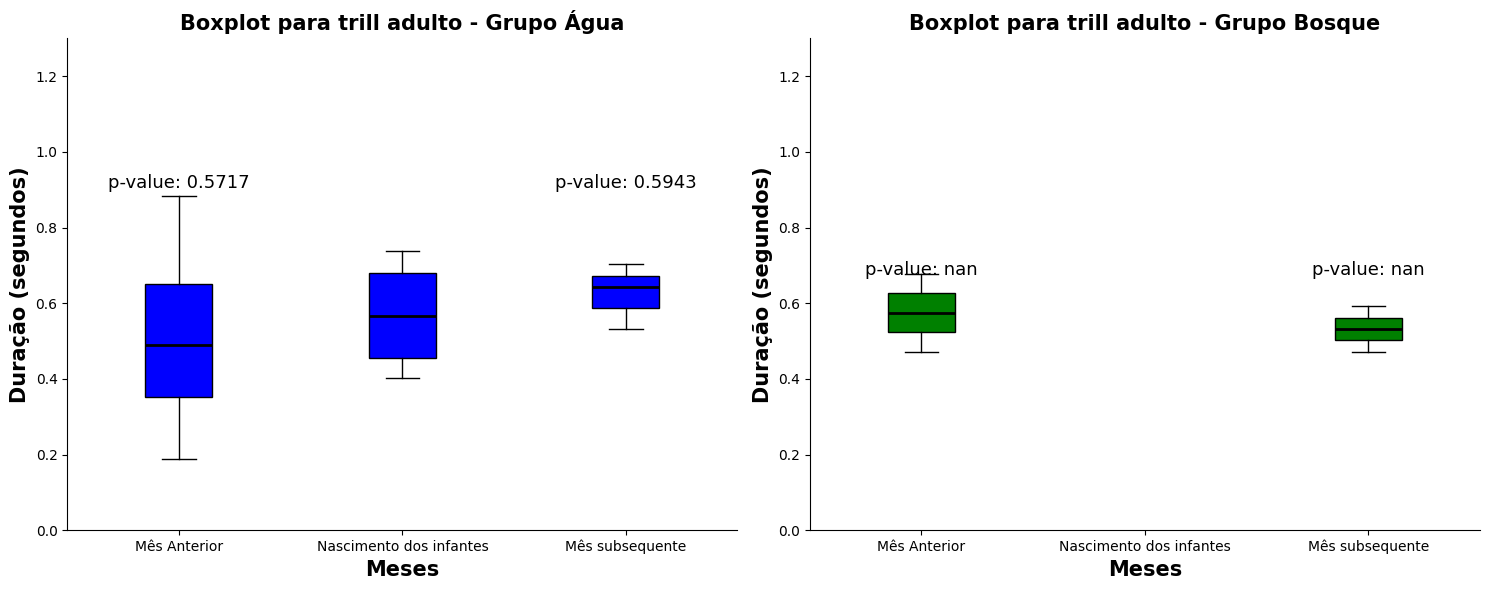

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Carregando os arquivos Excel
excel_file1 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Agua_bb_adulto.xlsx'
excel_file2 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Bosque_bb_adulto.xlsx'

# Lista de abas para a primeira tabela (Água)
abas_agua = ['Gravador 01', 'Gravador 04', 'Gravador 05', 'Gravador 06']

# Lista de abas para a segunda tabela (Bosque)
abas_bosque = ['Gravador 01', 'Gravador 03', 'Gravador 04', 'Gravador 06', 'Gravador 07', 'Gravador 09']

# Função para criar o dataframe para cada tabela
def create_dataframe(excel_file, abas):
    df_list = []
    for aba in abas:
        df_temp = pd.read_excel(excel_file, sheet_name=aba)
        df_temp['Tabela'] = aba
        df_list.append(df_temp)
    return pd.concat(df_list, ignore_index=True)

# Criando dataframes para Água e Bosque
df_agua = create_dataframe(excel_file1, abas_agua)
df_bosque = create_dataframe(excel_file2, abas_bosque)

# Convertendo a coluna de Data para o formato de data
df_agua['Data'] = pd.to_datetime(df_agua['Data'], format='%d/%m/%y')
df_bosque['Data'] = pd.to_datetime(df_bosque['Data'], format='%d/%m/%y')

# Função para filtrar o dataframe para o tipo de vocalização selecionado
def filter_dataframe(dataframe, vocalization_type):
    return dataframe[(dataframe['Classificacao'] == vocalization_type) & (dataframe['Tempototal'] >= 0.0)]

# Função para criar os boxplots entre os meses desejados e realizar o teste t
def plot_boxplots_and_ttest(ax, dataframe, target_month, title, group):
    previous_month = target_month - 1
    next_month = target_month + 1

    target_data = dataframe[dataframe['Data'].dt.month == target_month]['Tempototal']
    previous_data = dataframe[dataframe['Data'].dt.month == previous_month]['Tempototal']
    next_data = dataframe[dataframe['Data'].dt.month == next_month]['Tempototal']

    # Escolhendo a cor com base no grupo
    palette_colors = {'Água': 'blue', 'Bosque': 'green'}
    boxplot_color = palette_colors[group]

    # Criando o boxplot e preenchendo o interior com a cor correspondente
    bp = ax.boxplot([previous_data, target_data, next_data], labels=['Mês Anterior', 'Nascimento dos infantes', 'Mês subsequente'], patch_artist=True)

    # Alterando a cor do interior dos boxplots
    for box in bp['boxes']:
        box.set(facecolor=boxplot_color)

    # Alterando a cor da mediana para preto
    for median in bp['medians']:
        median.set(color='black', linewidth=2)

    ax.set_title(title, weight='bold', fontsize=15)
    ax.set_ylabel('Duração (segundos)', weight='bold', fontsize=15)
    ax.set_xlabel('Meses', weight='bold', fontsize=15)

    # Realizando o teste t para comparar o mês alvo com o mês anterior e o próximo mês
    t_statistic_prev, p_value_prev = ttest_ind(target_data, previous_data)
    t_statistic_next, p_value_next = ttest_ind(target_data, next_data)

    # Exibindo os valores de p no gráfico de forma dinâmica
    y_limit = ax.get_ylim()[1]  # Obtém o limite superior do eixo y
    p_text_offset = 0.0009 * y_limit  # Define um deslocamento relativo ao limite superior do eixo y para o texto

    ax.text(1, y_limit - p_text_offset, f'p-value: {p_value_prev:.4f}', ha='center', va='center', fontsize=13)
    ax.text(3, y_limit - p_text_offset, f'p-value: {p_value_next:.4f}', ha='center', va='center', fontsize=13)

    # Definindo limites do eixo y para terminar em 2.5
    ax.set_ylim([0, 1.3])
    # Remover as bordas superior e direita
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Especificando os meses alvo para cada grupo
target_month_agua = 4  # Água
target_month_bosque = 4  # Bosque

# Filtrando os dataframes para o tipo de vocalização desejado
vocalization_type = 'trill adulto'
df_agua_filtered = filter_dataframe(df_agua, vocalization_type)
df_bosque_filtered = filter_dataframe(df_bosque, vocalization_type)

# Criando uma figura com dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Criando os boxplots para Água e Bosque nos subplots correspondentes
plot_boxplots_and_ttest(ax1, df_agua_filtered, target_month_agua, f' {vocalization_type} - Grupo Água', 'Água')
plot_boxplots_and_ttest(ax2, df_bosque_filtered, target_month_bosque, f' {vocalization_type} - Grupo Bosque', 'Bosque')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
# plt.savefig(r'G:\Meu Drive\Mestrado\Triagem dos dados\imagens\boxplot_nascimento abril_trill adulto.png', bbox_inches='tight')

plt.show()

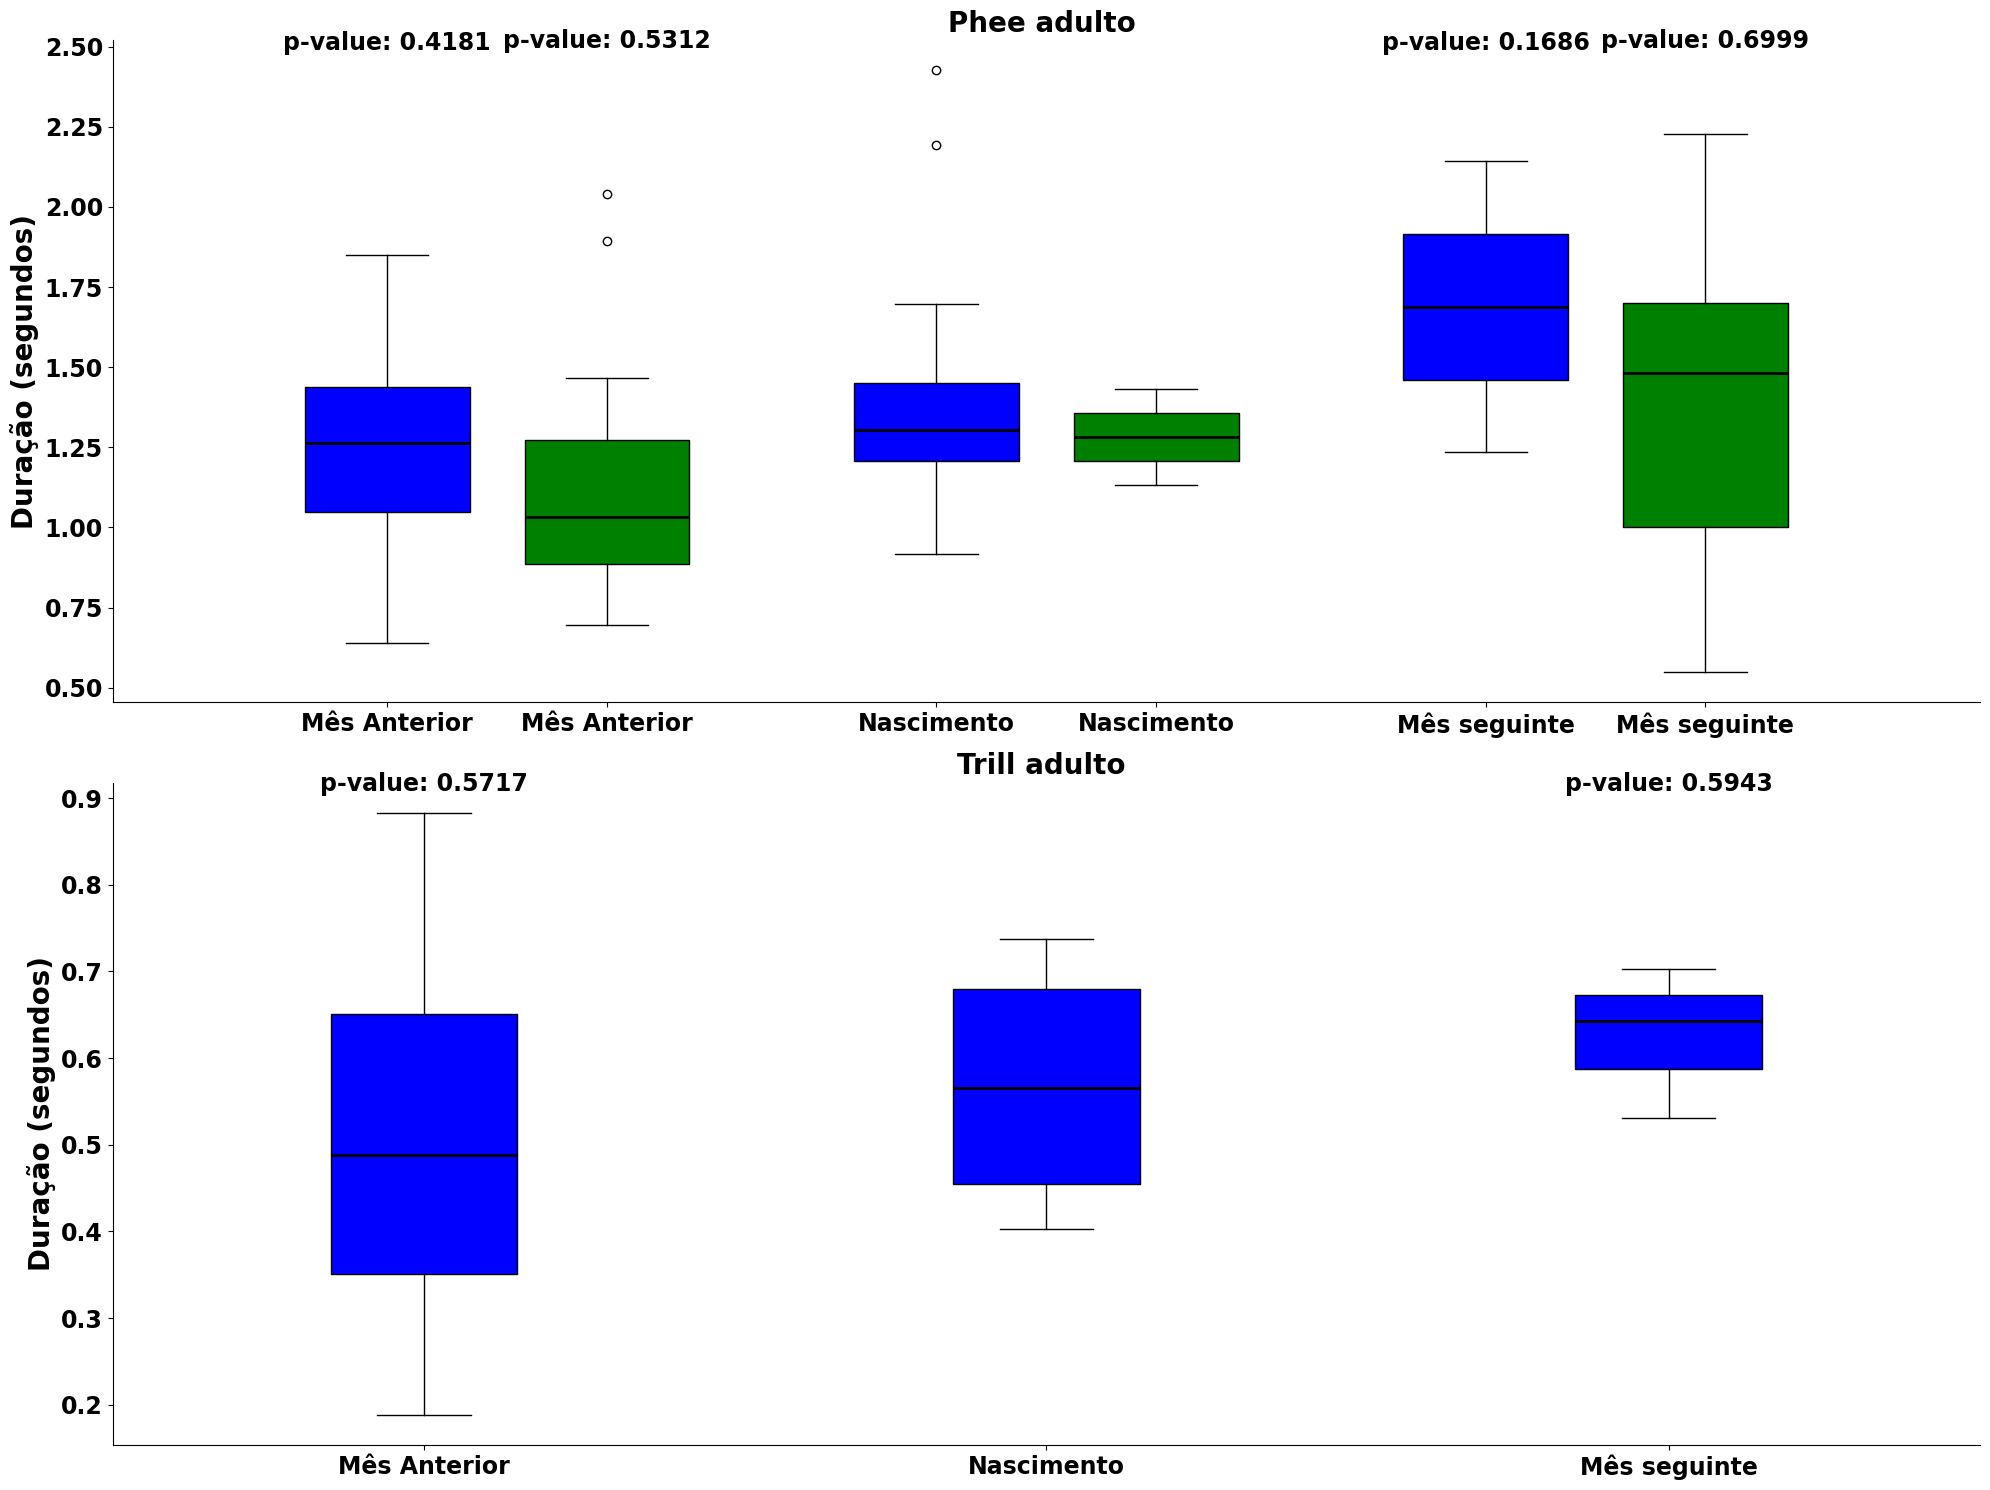

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Carregando os arquivos Excel
excel_file1 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Agua_bb_adulto.xlsx'
excel_file2 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Bosque_bb_adulto.xlsx'

# Lista de abas para a primeira tabela (Água)
abas_agua = ['Gravador 01', 'Gravador 04', 'Gravador 05', 'Gravador 06']

# Lista de abas para a segunda tabela (Bosque)
abas_bosque = ['Gravador 01', 'Gravador 03', 'Gravador 04', 'Gravador 06', 'Gravador 07', 'Gravador 09']

# Função para criar o dataframe para cada tabela
def create_dataframe(excel_file, abas):
    df_list = []
    for aba in abas:
        df_temp = pd.read_excel(excel_file, sheet_name=aba)
        df_temp['Tabela'] = aba
        df_list.append(df_temp)
    return pd.concat(df_list, ignore_index=True)

# Criando dataframes para Água e Bosque
df_agua = create_dataframe(excel_file1, abas_agua)
df_bosque = create_dataframe(excel_file2, abas_bosque)

# Convertendo a coluna de Data para o formato de data
df_agua['Data'] = pd.to_datetime(df_agua['Data'], format='%d/%m/%y')
df_bosque['Data'] = pd.to_datetime(df_bosque['Data'], format='%d/%m/%y')

# Função para filtrar o dataframe para o tipo de vocalização selecionado
def filter_dataframe(dataframe, vocalization_type):
    return dataframe[(dataframe['Classificacao'] == vocalization_type) & (dataframe['Tempototal'] >= 0.0)]

# Função para criar os boxplots entre os meses desejados e realizar o teste t
def plot_boxplots_and_ttest(ax, dataframe, target_month, title, group, offset):
    previous_month = target_month - 1
    next_month = target_month + 1

    target_data = dataframe[dataframe['Data'].dt.month == target_month]['Tempototal']
    previous_data = dataframe[dataframe['Data'].dt.month == previous_month]['Tempototal']
    next_data = dataframe[dataframe['Data'].dt.month == next_month]['Tempototal']

    # Escolhendo a cor com base no grupo
    palette_colors = {'Água': 'blue', 'Bosque': 'green'}
    boxplot_color = palette_colors[group]

    # Ajustando as posições dos boxplots com base no offset
    positions = [1 + offset, 2 + offset, 3 + offset]

    # Criando o boxplot e preenchendo o interior com a cor correspondente
    bp = ax.boxplot([previous_data, target_data, next_data], positions=positions, labels=['Mês Anterior', 'Nascimento', 'Mês seguinte'], patch_artist=True)
 # Alterando o estilo dos ticks e labels do eixo x e y
    plt.sca(ax)  # Define o eixo atual como ax
    plt.xticks(fontsize=17, weight='bold')
    plt.yticks(fontsize=17, weight='bold')
    
    # Alterando a cor do interior dos boxplots
    for box in bp['boxes']:
        box.set(facecolor=boxplot_color)

    # Alterando a cor da mediana para preto
    for median in bp['medians']:
        median.set(color='black', linewidth=2)

    ax.set_title(title, weight='bold', fontsize=20)
    ax.set_ylabel('Duração (segundos)', weight='bold', fontsize=20)
    ax.set_xlabel('', weight='bold', fontsize=15)

    # Realizando o teste t para comparar o mês alvo com o mês anterior e o próximo mês
    t_statistic_prev, p_value_prev = ttest_ind(target_data, previous_data)
    t_statistic_next, p_value_next = ttest_ind(target_data, next_data)

    # Exibindo os valores de p no gráfico de forma dinâmica
    y_limit = ax.get_ylim()[1]  # Obtém o limite superior do eixo y
    p_text_offset = 0.0009 * y_limit  # Define um deslocamento relativo ao limite superior do eixo y para o texto

    ax.text(1 + offset, y_limit - p_text_offset, f'p-value: {p_value_prev:.4f}', ha='center', va='center', weight='bold', fontsize=17)
    ax.text(3 + offset, y_limit - p_text_offset, f'p-value: {p_value_next:.4f}', ha='center', va='center', weight='bold', fontsize=17)

    # Definindo limites do eixo y para terminar em 2.5
    # ax.set_ylim([0, 1.3])
    # Remover as bordas superior e direita
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Especificando os meses alvo para cada grupo
target_month_agua = 4  # Água
target_month_bosque = 4  # Bosque

# Filtrando os dataframes para os tipos de vocalização desejados
vocalization_type_phee = 'phee adulto'
vocalization_type_trill = 'trill adulto'
df_agua_phee = filter_dataframe(df_agua, vocalization_type_phee)
df_agua_trill = filter_dataframe(df_agua, vocalization_type_trill)
df_bosque_phee = filter_dataframe(df_bosque, vocalization_type_phee)
df_bosque_trill = filter_dataframe(df_bosque, vocalization_type_trill)

# Criando uma figura com dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))

# Criando os boxplots para Água no primeiro subplot - Phee
plot_boxplots_and_ttest(ax1, df_agua_phee, target_month_agua, f'Phee adulto ', 'Água', -0.2)
# Replicando o boxplot para Bosque no primeiro subplot - Phee
plot_boxplots_and_ttest(ax1, df_bosque_phee, target_month_bosque, f'Phee adulto ', 'Bosque', 0.2)

# Criando os boxplots para Água no segundo subplot - Trill
plot_boxplots_and_ttest(ax2, df_agua_trill, target_month_agua, f'Trill adulto ', 'Água', -0.2)
# Replicando o boxplot para Bosque no segundo subplot - Trill
# plot_boxplots_and_ttest(ax2, df_bosque_trill, target_month_bosque, f'Trill adulto ', 'Bosque', 0.2)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
# plt.savefig(r'G:\Meu Drive\Mestrado\Triagem dos dados\imagens\boxplot nascimento adulto abril.png', bbox_inches='tight')

plt.show()